In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler as scaler

In [5]:
df = pd.read_csv('../data/raw/df_train.csv' , encoding='cp1252')

In [6]:
df

Flow ID      Source IP  Source Port  \
0        192.168.10.3-192.168.10.16-53-45506-17  192.168.10.16      45506.0   
1           172.16.0.1-192.168.10.50-46298-80-6     172.16.0.1      46298.0   
2         192.168.10.3-192.168.10.5-53-63360-17   192.168.10.5      63360.0   
3          192.168.10.5-23.61.187.27-50113-80-6   23.61.187.27         80.0   
4           172.16.0.1-192.168.10.50-44526-80-6     172.16.0.1      44526.0   
...                                         ...            ...          ...   
3119340   192.168.10.3-192.168.10.9-53-62559-17   192.168.10.9      62559.0   
3119341   192.168.10.1-192.168.10.3-53-61605-17   192.168.10.3      61605.0   
3119342     172.16.0.1-192.168.10.50-54164-80-6     172.16.0.1      54164.0   
3119343     172.16.0.1-192.168.10.50-60306-80-6     172.16.0.1      60306.0   
3119344  192.168.10.3-192.168.10.17-53-18809-17  192.168.10.17      18809.0   

        Destination IP  Destination Port  Protocol            Timestamp  \
0         192.168.10.3              53.0      17.0       7/7/2017 10:55   
1        192.168.10.50              80.0       6.0       5/7/2017 10:44   
2         192.168.10.3              53.0      17.0       7/7/2017 11:51   
3         192.168.10.5           50113.0       6.0  03/07/2017 03:34:29   
4        192.168.10.50              80.0       6.0       5/7/2017 10:58   
...                ...               ...       ...                  ...   
3119340   192.168.10.3              53.0      17.0        6/7/2017 3:21   
3119341   192.168.10.1              53.0      17.0        5/7/2017 9:25   
3119342  192.168.10.50              80.0       6.0       5/7/2017 10:43   
3119343  192.168.10.50              80.0       6.0       5/7/2017 10:57   
3119344   192.168.10.3              53.0      17.0       7/7/2017 10:29   

         Flow Duration  Total Fwd Packets  Total Backward Packets  ...  \
0              31087.0                2.0                     2.0  ...   
1           98335726.0                8.0                     5.0  ...   
2                222.0                2.0                     2.0  ...   
3                 66.0                1.0                     1.0  ...   
4                  4.0                2.0                     0.0  ...   
...                ...                ...                     ...  ...   
3119340          222.0                2.0                     2.0  ...   
3119341        30445.0                1.0                     1.0  ...   
3119342            0.0                2.0                     0.0  ...   
3119343          998.0                2.0                     0.0  ...   
3119344          235.0                2.0                     2.0  ...   

         min_seg_size_forward  Active Mean  Active Std  Active Max  \
0                        32.0          0.0         0.0         0.0   
1                        32.0       1008.0         0.0      1008.0   
2                        32.0          0.0         0.0         0.0   
3                        20.0          0.0         0.0         0.0   
4                        32.0          0.0         0.0         0.0   
...                       ...          ...         ...         ...   
3119340                  32.0          0.0         0.0         0.0   
3119341                  20.0          0.0         0.0         0.0   
3119342                  32.0          0.0         0.0         0.0   
3119343                  32.0          0.0         0.0         0.0   
3119344                  20.0          0.0         0.0         0.0   

         Active Min   Idle Mean  Idle Std    Idle Max    Idle Min  Label  
0               0.0         0.0       0.0         0.0         0.0      0  
1            1008.0  98300000.0       0.0  98300000.0  98300000.0      1  
2               0.0         0.0       0.0         0.0         0.0      0  
3               0.0         0.0       0.0         0.0         0.0      0  
4               0.0         0.0       0.0         0.0         0.0      1  
...       

In [7]:
sampledf = df.sample(n=50000,random_state=42)

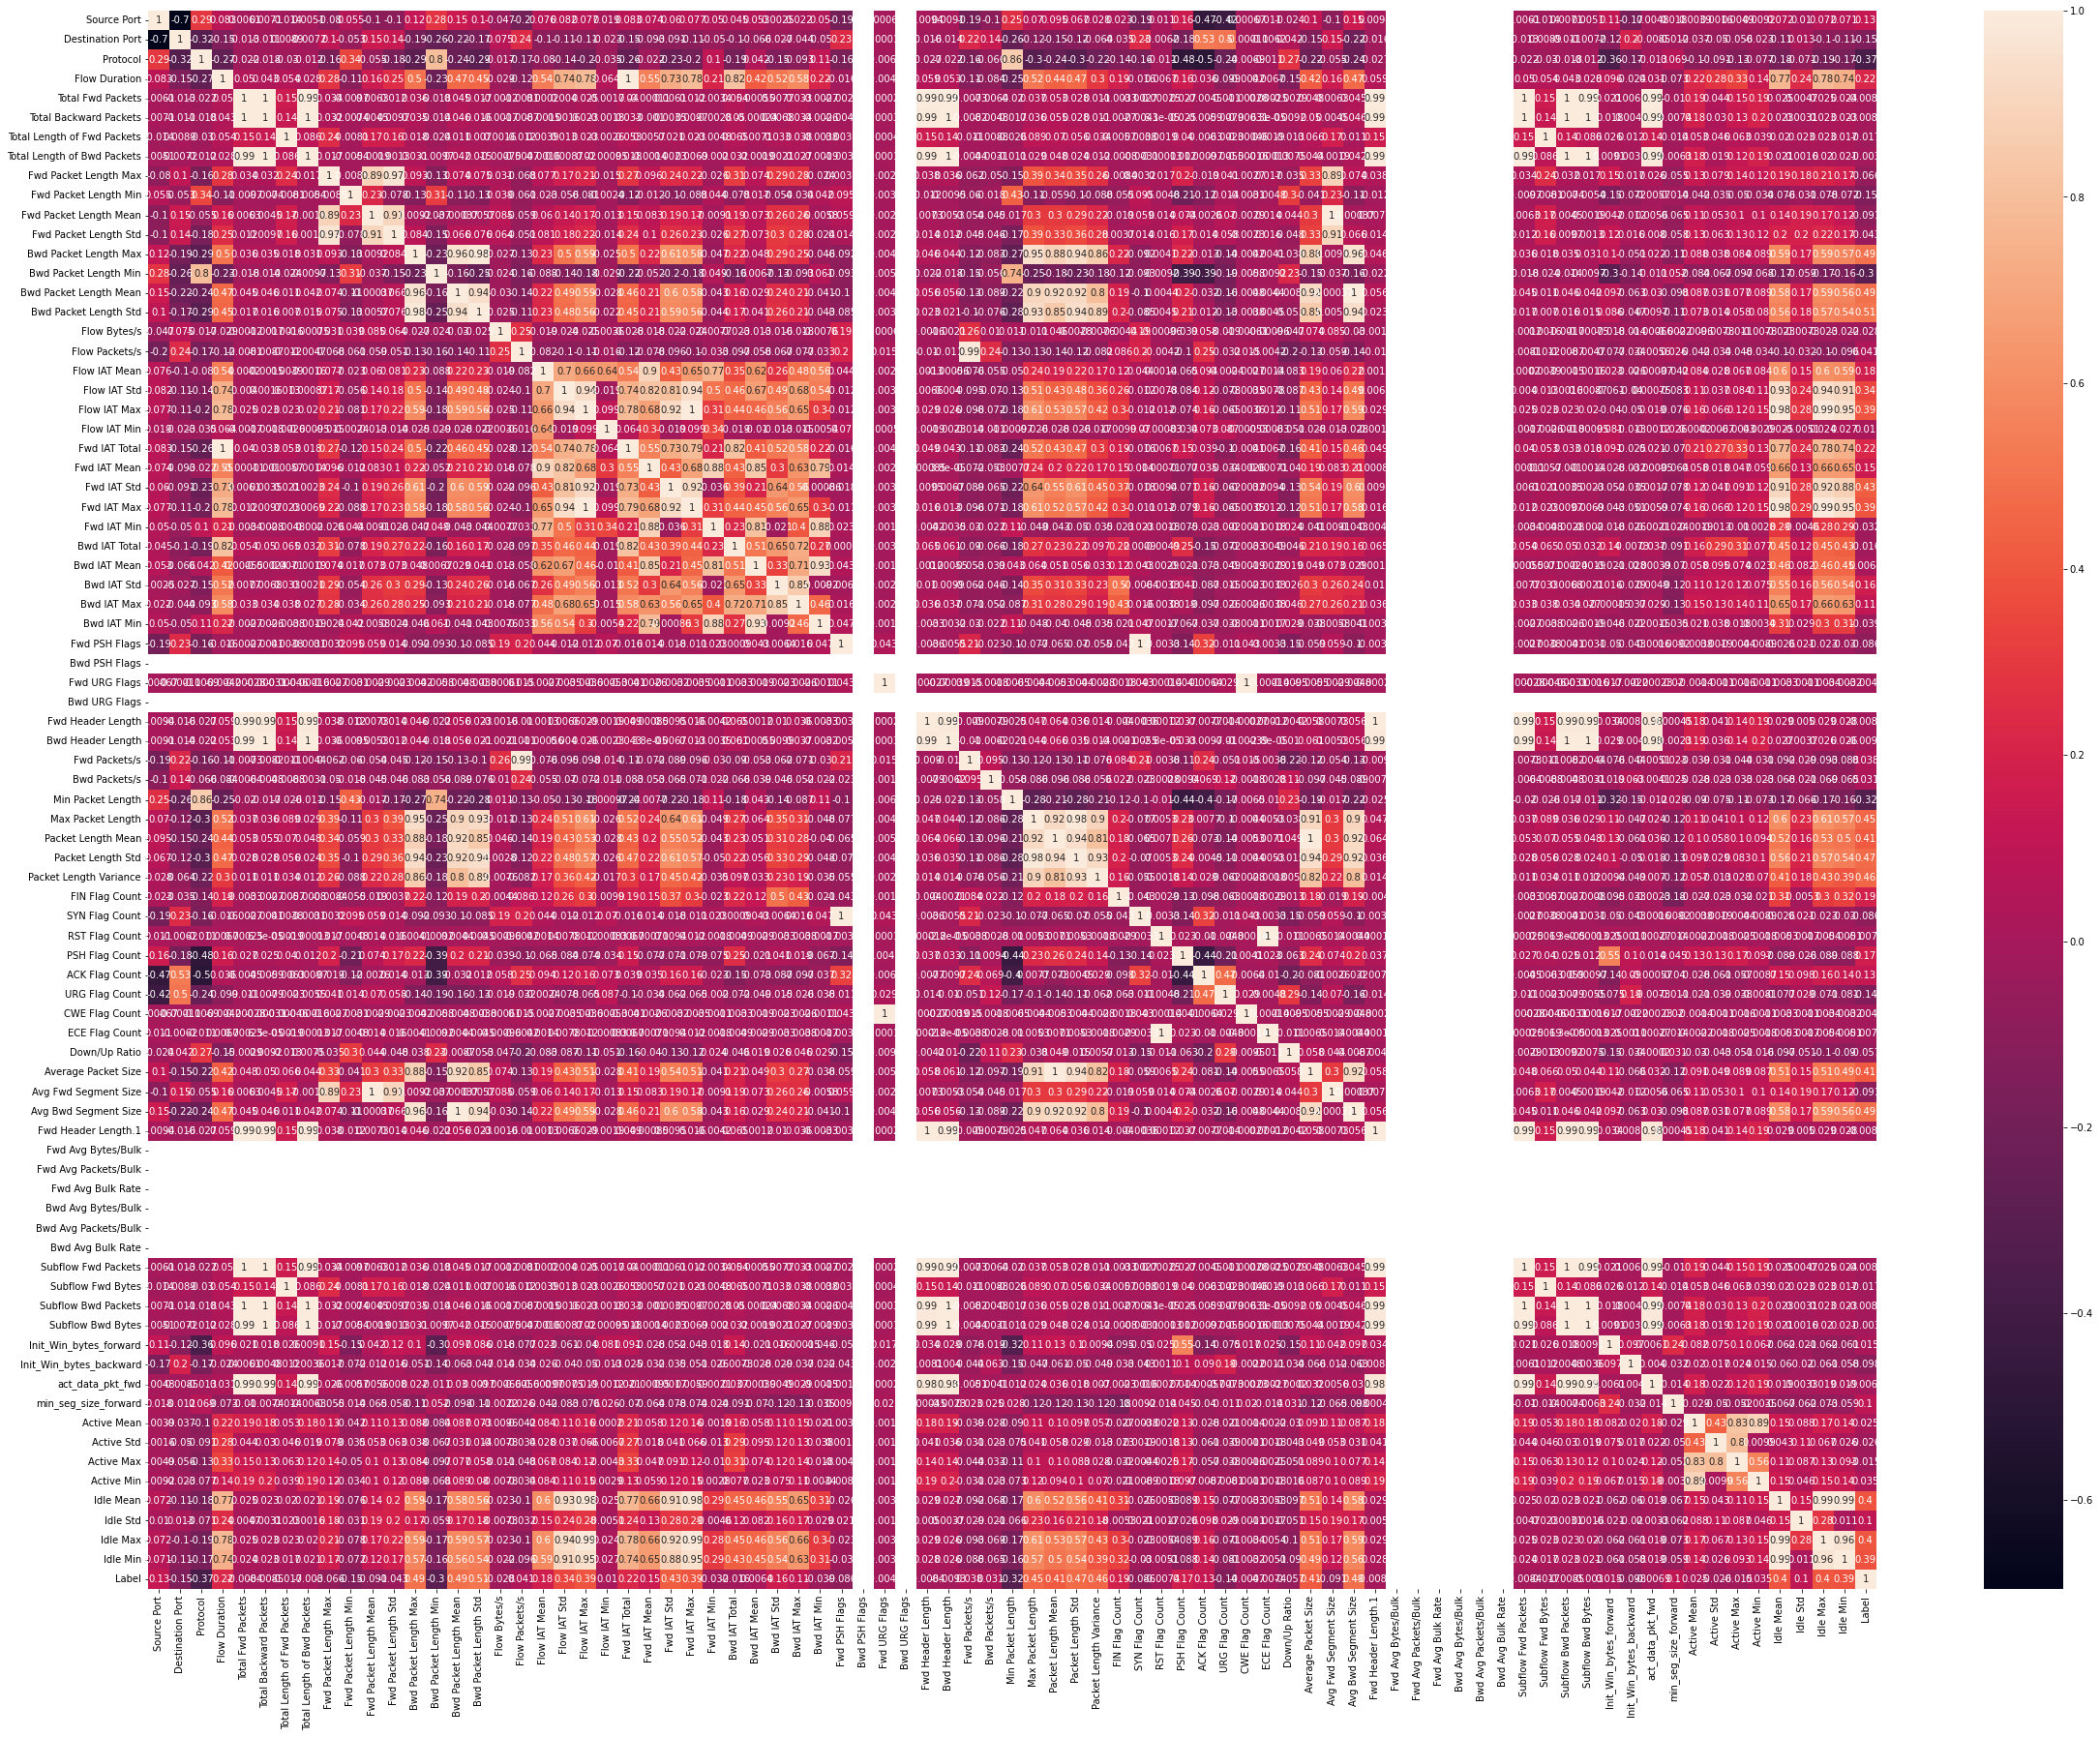

In [8]:
plt.figure(figsize=(40,30))
sns.heatmap(sampledf.corr(),annot=True);

### check unique valeu

In [9]:
suspiciousData = []

for col in sampledf:
    if len(sampledf[col].unique()) >= 1:
        suspiciousData.append(col)
sampledf[suspiciousData].describe()

Source Port  Destination Port      Protocol  Flow Duration  \
count  45366.000000      45366.000000  45366.000000   4.536600e+04   
mean   41206.197372       7980.709650      9.850461   1.503891e+07   
std    22221.995799      18193.137476      5.253934   3.386053e+07   
min        0.000000          0.000000      0.000000   0.000000e+00   
25%    33048.500000         53.000000      6.000000   1.540000e+02   
50%    50925.000000         80.000000      6.000000   3.149900e+04   
75%    58363.500000        443.000000     17.000000   3.792005e+06   
max    65535.000000      65529.000000     17.000000   1.199999e+08   

       Total Fwd Packets  Total Backward Packets  Total Length of Fwd Packets  \
count       45366.000000            45366.000000                 4.536600e+04   
mean            6.667063                6.726139                 5.768084e+02   
std           156.566638              206.966705                 1.186640e+04   
min             1.000000                0.000000                 0.000000e+00   
25%             2.000000                1.000000                 1.200000e+01   
50%             2.000000                2.000000                 6.200000e+01   
75%             5.000000                4.000000                 1.930000e+02   
max         32613.000000            43008.000000                 2.428415e+06   

       Total Length of Bwd Packets  Fwd Packet Length Max  \
count                 4.536600e+04           45366.000000   
mean                  7.876459e+03             211.355024   
std                   4.633792e+05             741.956548   
min                   0.000000e+00               0.000000   
25%                   2.000000e+00               6.000000   
50%                   1.240000e+02              37.000000   
75%                   4.860000e+02              84.000000   
max                   9.696823e+07           23360.000000   

       Fwd Packet Length Min  ...  min_seg_size_forward   Active Mean  \
count           45366.000000  ...          45366.000000  4.536600e+04   
mean               18.149429  ...             26.106071  8.605161e+04   
std                55.586245  ...              6.597151  5.758094e+05   
min                 0.000000  ...              0.000000  0.000000e+00   
25%                 0.000000  ...             20.000000  0.000000e+00   
50%                 2.000000  ...             24.000000  0.000000e+00   
75%                36.000000  ...             32.000000  0.000000e+00   
max              1983.000000  ...             60.000000  1.890871e+07   

         Active Std    Active Max    Active Min     Idle Mean      Idle Std  \
count  4.536600e+04  4.536600e+04  4.536600e+04  4.536600e+04  4.536600e+04   
mean   4.190499e+04  1.585907e+05  6.186444e+04  8.498150e+06  5.278875e+05   
std    3.500512e+05  9.247789e+05  5.098873e+05  2.386084e+07  4.678447e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.330000e+07  3.270000e+07  1.890871e+07  1.197282e+08  7.208464e+07   

           Idle Max      Idle Min         Label  
count  4.536600e+04  4.536600e+04  50000.000000  
mean   8.896080e+06  8.084394e+06      0.273620  
std    2.461074e+07  2.359141e+07      0.445821  
min    0.000000e+00  0.000000e+00      0.000000  
25%    0.000000e+00  0.000000e+00      0.000000  
50%    0.000000e+00  0.000000e+00      0.000000  
75%    0.000000e+00  0.000000e+00      1.000000  
max    1.197282e+08  1.197282e+08      1.000000  

[8 rows x 81 columns]

### drop unique and nan values

In [10]:
def preprossening_all(df):
    df_new = df.drop(['Bwd PSH Flags' ,'Bwd URG Flags', 'Fwd Avg Bytes/Bulk' , 'Fwd Avg Packets/Bulk',
                        'Bwd Avg Bytes/Bulk' , 'Bwd Avg Packets/Bulk',
                          'Flow ID', 'Source IP', 'Source Port',
                           'Destination IP', 'Destination Port', 
                          'Protocol', 'Timestamp','Fwd Avg Bulk Rate', 'Bwd Avg Bulk Rate'], axis=1)
    
    df_clean = df_new.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

    
    return df_clean 
    

In [11]:
new_df = preprossening_all(sampledf)

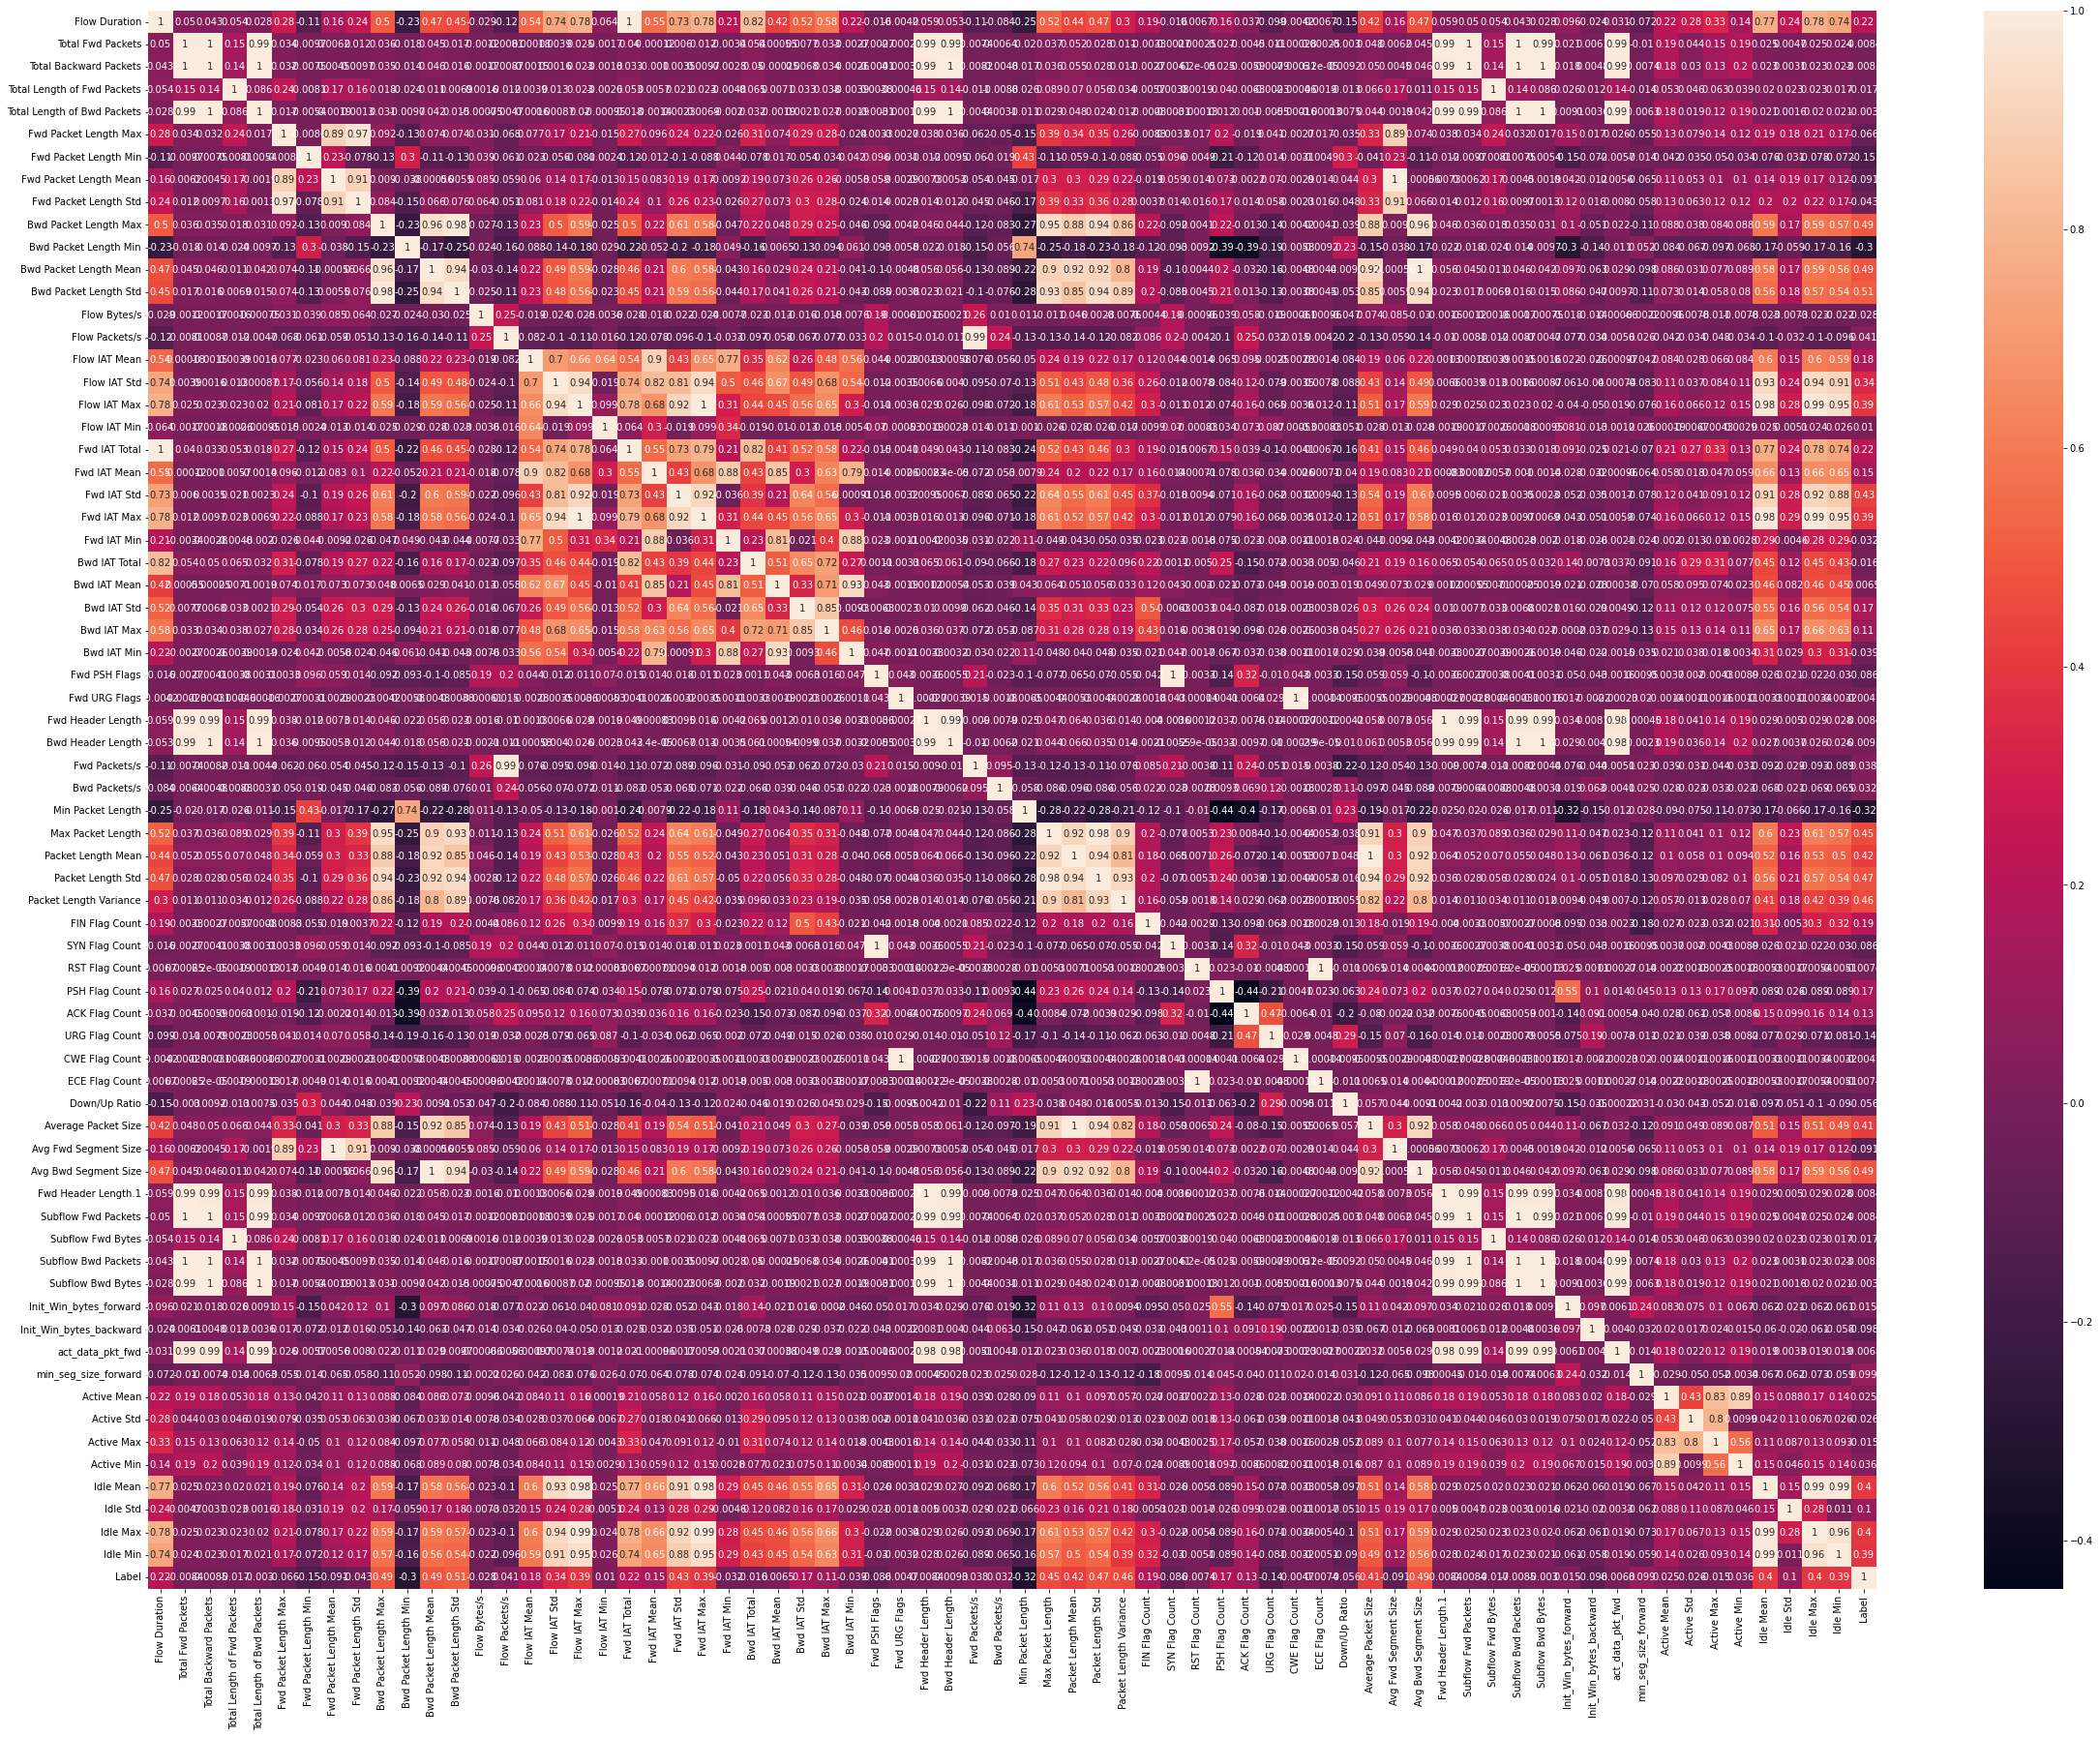

In [12]:
plt.figure(figsize=(40,30))
sns.heatmap(new_df.corr(),annot=True);

### split data for train and valid

In [13]:
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

### feature importance selection

In [30]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

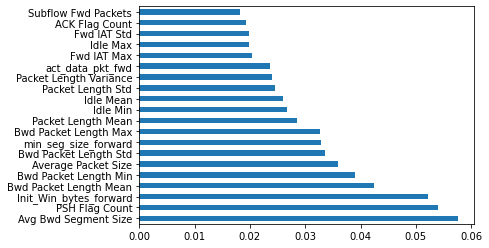

In [31]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_im = feat_importances.nlargest(20)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [32]:
mydict = dict(feat_importances.nlargest(20))
cols = list(mydict.keys())

In [33]:
important_dataset= new_df[cols]
important_dataset['Label'] = new_df.Label
important_dataset.head()

C:\Users\Ekhlas\AppData\Local\Temp\ipykernel_8044\1352566246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_dataset['Label'] = new_df.Label


Avg Bwd Segment Size  PSH Flag Count  Init_Win_bytes_forward  \
783575             135.000000             0.0                    -1.0   
1084554           1656.428571             1.0                 29200.0   
2139236              0.000000             0.0                   360.0   
1128961            112.000000             0.0                    -1.0   
1618260              6.000000             1.0                  1024.0   

         Bwd Packet Length Mean  Bwd Packet Length Min  Average Packet Size  \
783575               135.000000                  135.0            95.250000   
1084554             1656.428571                    0.0          1118.818182   
2139236                0.000000                    0.0             9.000000   
1128961              112.000000                  112.0           107.000000   
1618260                6.000000                    6.0             5.000000   

         Bwd Packet Length Std  min_seg_size_forward  Bwd Packet Length Max  \
783575                0.000000                  32.0                  135.0   
1084554            1757.579003                  32.0                 4344.0   
2139236               0.000000                  20.0                    0.0   
1128961               0.000000                  32.0                  112.0   
1618260               0.000000                  24.0                    6.0   

         Packet Length Mean  ...  Idle Mean  Packet Length Std  \
783575            76.200000  ...        0.0          53.676811   
1084554         1025.583333  ...        0.0        1518.743827   
2139236            6.000000  ...        0.0           0.000000   
1128961           71.333333  ...        0.0          35.218366   
1618260            3.333333  ...        0.0           2.309401   

         Packet Length Variance  act_data_pkt_fwd  Fwd IAT Max  Idle Max  \
783575             2.881200e+03               1.0         49.0       0.0   
1084554            2.306583e+06               2.0     205011.0       0.0   
2139236            0.000000e+00               1.0          4.0       0.0   
1128961            1.240333e+03               0.0          0.0       0.0   
1618260            5.333333e+00               0.0          0.0       0.0   

         Fwd IAT Std  ACK Flag Count  Subflow Fwd Packets  Label  
783575        0.0000             0.0                  2.0      0  
1084554  115057.2341             0.0                  4.0      1  
2139236       0.0000             1.0                  2.0      0  
1128961       0.0000             0.0                  1.0      0  
1618260       0.0000             0.0                  1.0      1  

[5 rows x 21 columns]

### split importance data

In [34]:
X_important = important_dataset.iloc[:,:-1]
y_important = important_dataset.iloc[:,-1]
X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_important, y_important, test_size=0.3, random_state=1)

In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
import time

def model_metrics(model, X_train, X_valid, y_train, y_valid):
    time1 = time.time()
#     model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    print('Training Time:', time.time() - time1)
        
    time2 = time.time()
    preds = model.predict(X_valid)
    print('validation Time:', time.time() - time2)
        
    calculate_metrics(y_valid, preds)
    print()
    print(classification_report(y_valid, preds))
    print()
#     confusion_matrix = confusion_matrix(y_test, preds)
    ConfusionMatrixDisplay(confusion_matrix(y_valid, preds), display_labels = model.classes_).plot()
    print()
    return model

def calculate_metrics(y_true, y_pred):
    print()
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred))
    print('Recall:', recall_score(y_true, y_pred))
    print('f1 score:', f1_score(y_true, y_pred))
    print()
    


Training Time: 0.21973586082458496
validation Time: 0.015628814697265625

Accuracy: 0.9991833491513452
Precision: 0.9972326765552357
Recall: 0.9986697705354174
f1 score: 0.9979507061755747


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36286
           1       1.00      1.00      1.00      9021

    accuracy                           1.00     45307
   macro avg       1.00      1.00      1.00     45307
weighted avg       1.00      1.00      1.00     45307





DecisionTreeClassifier()

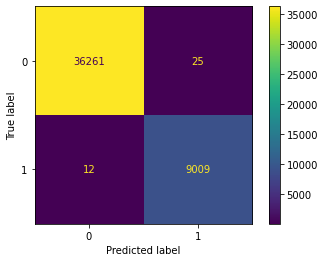

In [38]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
model_metrics(tree_model, X_important, X_important, y_important, y_important)

### apply ensample methode for basic model

In [21]:
from sklearn.utils import resample

In [39]:
train = pd.concat([X_important, y_important], axis=1)
train

Avg Bwd Segment Size  PSH Flag Count  Init_Win_bytes_forward  \
783575             135.000000             0.0                    -1.0   
1084554           1656.428571             1.0                 29200.0   
2139236              0.000000             0.0                   360.0   
1128961            112.000000             0.0                    -1.0   
1618260              6.000000             1.0                  1024.0   
...                       ...             ...                     ...   
1474273              6.000000             0.0                  1129.0   
2499276           1658.142857             1.0                  8192.0   
1549566              0.000000             0.0                   975.0   
2852669              6.000000             0.0                   235.0   
1610376             98.000000             0.0                    -1.0   

         Bwd Packet Length Mean  Bwd Packet Length Min  Average Packet Size  \
783575               135.000000                  135.0            95.250000   
1084554             1656.428571                    0.0          1118.818182   
2139236                0.000000                    0.0             9.000000   
1128961              112.000000                  112.0           107.000000   
1618260                6.000000                    6.0             5.000000   
...                         ...                    ...                  ...   
1474273                6.000000                    6.0            13.750000   
2499276             1658.142857                    0.0          1163.300000   
1549566                0.000000                    0.0            10.333333   
2852669                6.000000                    6.0             3.000000   
1610376               98.000000                   98.0            73.000000   

         Bwd Packet Length Std  min_seg_size_forward  Bwd Packet Length Max  \
783575                0.000000                  32.0                  135.0   
1084554            1757.579003                  32.0                 4344.0   
2139236               0.000000                  20.0                    0.0   
1128961               0.000000                  32.0                  112.0   
1618260               0.000000                  24.0                    6.0   
...                        ...                   ...                    ...   
1474273               0.000000                  20.0                    6.0   
2499276            2127.597740                  20.0                 5840.0   
1549566               0.000000                  32.0                    0.0   
2852669               0.000000                  32.0                    6.0   
1610376               0.000000                  32.0                   98.0   

         Packet Length Mean  ...  Idle Mean  Packet Length Std  \
783575            76.200000  ...        0.0          53.676811   
1084554         1025.583333  ...        0.0        1518.743827   
2139236            6.000000  ...        0.0           0.000000   
1128961           71.333333  ...        0.0          35.218366   
1618260            3.333333  ...        0.0           2.309401   
...                     ...  ...        ...                ...   
1474273           11.000000  ...        0.0          11.180340   
2499276         1057.545455  ...        0.0        1846.729724   
1549566            7.750000  ...        0.0          15.500000   
2852669            2.400000  ...        0.0           3.286335   
1610376           58.400000  ...        0.0          36.149689   

         Packet Length Variance  act_data_pkt_fwd  Fwd IAT Max  Idle Max  \
783575             2.881200e+03               1.0         49.0       0.0   
1084554            2.306583e+06               2.0     205011.0       0.0   
2139236            0.000000e+00               1.0          4.0       0.0   
1128961            1.240333e+03               0.0          0.0       0.0   
1618260            5.333333e+00               0.0          0.

In [40]:
# separate minority and majority classes
not_fraud = train[train.Label==0]
fraud = train[train.Label==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Label.value_counts()

0    36286
1    36286
Name: Label, dtype: int64

In [41]:
X_up = upsampled.iloc[:,:-1]
y_up = upsampled.iloc[:,-1]
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.3, random_state=1)

Training Time: 0.15421342849731445
validation Time: 0.0

Accuracy: 0.9974278890317839
Precision: 0.9953900055319934
Recall: 0.9994445473060545
f1 score: 0.9974131559497413


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10970
           1       1.00      1.00      1.00     10802

    accuracy                           1.00     21772
   macro avg       1.00      1.00      1.00     21772
weighted avg       1.00      1.00      1.00     21772





DecisionTreeClassifier()

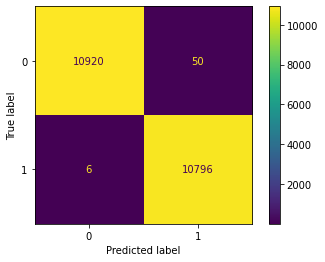

In [42]:
tree_model_up = tree.DecisionTreeClassifier()
model_metrics(tree_model_up, X_train_up, X_test_up, y_train_up,y_test_up)